In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sp
# from scipy.stats import expon, poisson, norm
# import statistics
# import pandas as pd
from math import exp, sqrt
import copy
# import random

In [3]:
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True

sns.set(style = 'whitegrid',context = 'notebook', 
        palette = 'dark', font_scale = 1.5)

# PROBLEM 3 Integrate-and-Fire neuron

## (a)
We will start by simulating the voltage across a neuron’s membrane when a current I = 1 nA is injected. For a passive membrane, the voltage is given by the differential equation,
$C \frac{dV(t)}{dt} = gL (EL − V (t)) + I$

where C = 1nF is the membrane capacitance, gL = 0.1µS is the conductance of the membrane (“leak” conductance), and EL = −70 mV its reversal potential. This equation (and any other differential equation) can be solved numerically using the Euler method, i.e., using the approximation

$ V (t + ∆t) = V (t) + \frac{dV (t)}{ dt} ∆t . (2)$

Your task will be to implement this method for the above differential equation with initial condition V (0) = EL. Choose a stepwidth of ∆t = 1 ms and iterate the Euler method over 100 time steps up
to time t = 100 m

Parameter
$
\Delta t = 1ms\\
I = 1 nA \\
C = 1 nF \\
g_L = 0.1 \mu S\\
E_L = -70mV \\
V(0) = E_L \\
$
The equation
$ V (t + \Delta t) = \left( 1 - \frac{\Delta t g_L}{C} \right) V(t) + \frac{\Delta t (g_L E_L  + I)}{C} $

In [4]:
def leaky(time,delta_t = 1, I = 1, C = 1, g = 0.1, E = -70, V_0 = -70):
    V = np.zeros(len(time))
    V[0] = V_0 
    for t in range(len(time)-1):
        V[int(t + delta_t)] = (1 - ((delta_t * g)/C))*V[t] + delta_t*((g*E)+I)/C
    return V
#leaky = np.vectorize(leaky)

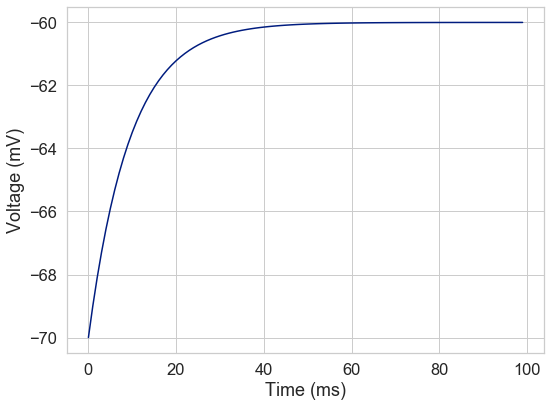

In [5]:
time = np.linspace(0, 100, 100)

V = leaky(time)
plt.plot(V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.savefig('fig1_p3_report3.png', dpi = 600)
plt.show()

## (b)
What happens if you change the input current I

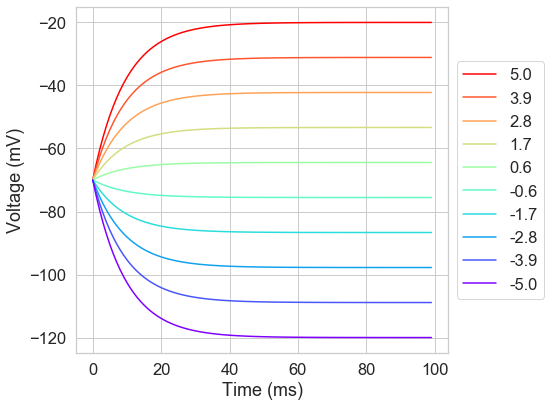

In [6]:
I = np.linspace(5, -5, 10)
colors = plt.cm.rainbow(np.linspace(1,0,len(I)))
for i,v in enumerate(I):
    V_i = leaky(time, I = v)
    plt.plot(V_i, color = colors[i])

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend(np.round(I, 1), loc='center left', bbox_to_anchor=(1, 0.5)  )
plt.savefig('fig2_p3_report3.png', dpi = 600)
plt.show()

# (c)

In [133]:
def leaky_analitical(time,delta_t = 1, I = 1, C = 1, g = 0.1, E = -70, V_0 = -70):
    V = np.zeros(len(time))
    V[0] = V_0 
    for t in range(len(time)-1):
        V[int(t + delta_t)] = E + I/g*(1 - exp(-g*t/C))
    return V

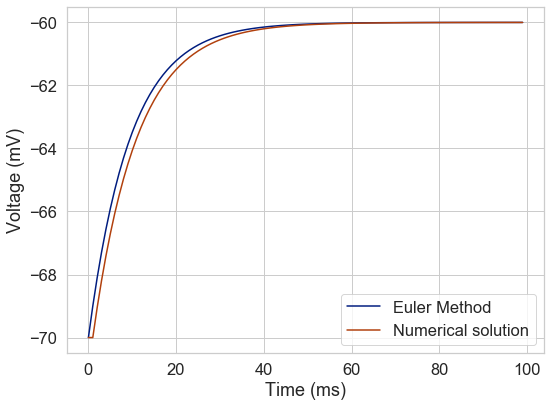

In [134]:
V = leaky(time)

V_a = leaky_analitical(time)

plt.plot(V)
plt.plot(V_a)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend(['Euler Method', 'Numerical solution'])
plt.savefig('fig3_p3_report3.png', dpi = 600)
plt.show()

# (d)
 We will now equip the passive membrane with a very simple action-potential-generating mechanism. For that purpose, we will assume that every time when the voltage V surpasses a threshold Vth, the neuron fires an action potential (=spike), and the membrane voltage is reset to V = EL. To implement the integrate-and-fire neuron, use the same simulation as in (a) and introduce the spiking threshold Vth. Use the threshold value Vth = −63mV. How many spikes do you get within the first t = 100ms? Change the input current and see how that changes the number of spikes

In [135]:
def leaky_th(time,delta_t = 1, I = 1, C = 1, g = 0.1, E = -70, V_0 = -70, th = -63):
    V = np.zeros(len(time))
    V[0] = V_0 
    spikes = []
    for t in range(len(time)-1):
        if V[t] <= th:
            V[int(t + delta_t)] = (1 - ((delta_t * g)/C))*V[t] + delta_t*((g*E)+I)/C
        else:
            V[int(t + delta_t)] = V_0
            spikes.append(t) 
    return V, spikes

c:\users\nicolas bruno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


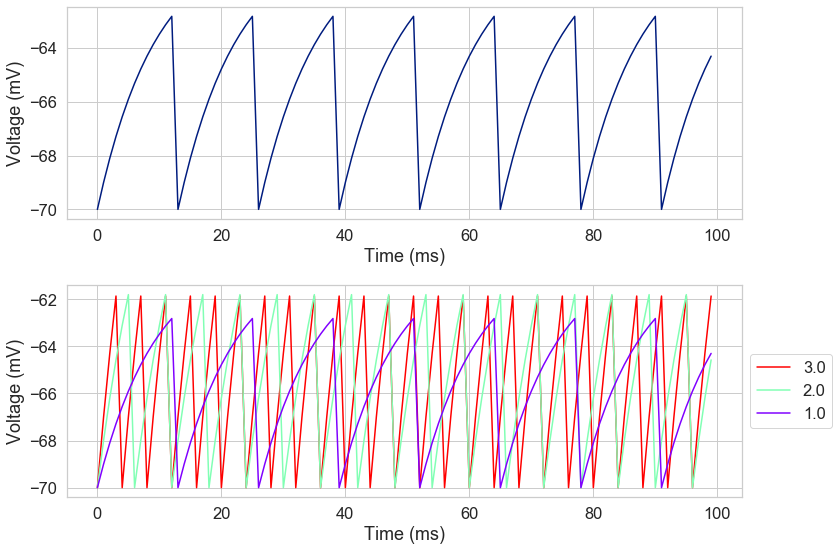

In [136]:
time = np.linspace(0, 100, 100)

V, spikes = leaky_th(time)

fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 8))

ax1.plot(V)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Voltage (mV)')

I = np.linspace(3, 1, 3)
colors = plt.cm.rainbow(np.linspace(1,0,len(I)))
for i,v in enumerate(I):
    V_i, s = leaky_th(time, I = v)
    ax2.plot(V_i, color = colors[i])

ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Voltage (mV)')
ax2.legend(np.round(I, 1), loc='center left', bbox_to_anchor=(1, 0.5)  )


fig.savefig('fig4_p3_report3.png',dpi = 600)
fig.show()

##  (e)
Plot the tuning curve of this neuron, i.e., the number of spikes within 100ms as a function of
the input current I. At what current does the neuron start firing? Which parameters determine the
current threshold?

In [137]:
I = np.linspace(0, 10, 100)
spikes = []
colors = plt.cm.rainbow(np.linspace(1,0,len(I)))
for i,v in enumerate(I):
    V_i, spks = leaky_th(time, I = v)
    spikes.append(spks)
    

sum_spks = [len(spikes[i]) for i,v in enumerate(spikes)]

c:\users\nicolas bruno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


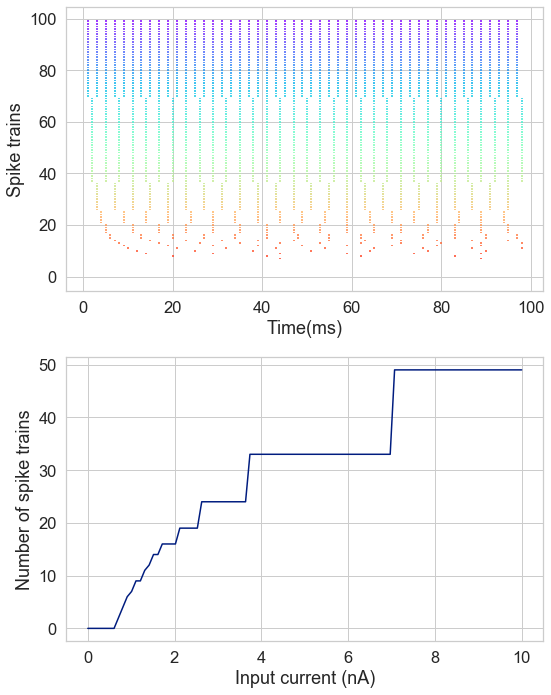

In [138]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 10))
ax1.eventplot(spikes, color = colors, linelengths = .6)
ax1.set_xlabel('Time(ms)')
ax1.set_ylabel('Spike trains')

ax2.plot(I,sum_spks)
ax2.set_xlabel('Input current (nA)')
ax2.set_ylabel('Number of spike trains')


fig.savefig('fig5_p3_report3.png',dpi = 600)
fig.show()

## (f)
How could you introduce a refractory period into the model?

In [139]:
def leaky_rp(time, rp = 1, delta_t = 1, I = 1, C = 1, g = 0.1, E = -70, V_0 = -70, th = -63):
    V = np.zeros(len(time))
    V[0] = V_0 
    spikes = []
    stop = 0
    for t in range(len(time)-1):
        if V[t] <= th and stop <= 0:
            V[int(t + delta_t)] = (1 - ((delta_t * g)/C))*V[t] + delta_t*((g*E)+I)/C
        elif V[t] > th:
            V[int(t + delta_t)] = V_0
            stop = rp *delta_t
            spikes.append(t) 
        else:
            V[int(t + delta_t)] = V_0
            stop -= 1
    return V, spikes

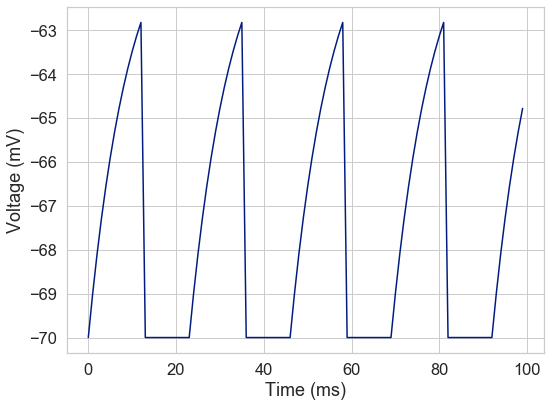

In [140]:
time = np.linspace(0, 100, 100)

V, spikes = leaky_rp(time, rp = 10)

plt.plot(V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.savefig('fig6_p3_report3.png',dpi = 600)
plt.show()

## (g)

In [141]:
def leaky_noise(time, rp = 10, sigma = 1, delta_t = 1, I = 1, C = 1, g = 0.1, E = -70, V_0 = -70, th = -63):
    V = np.zeros(len(time))
    V[0] = V_0 
    spikes = []
    stop = 0
    for t in range(len(time)-1):
        if V[t] <= th and stop <= 0:
            termV = (1 - ((delta_t * g)/C))*V[t] 
            termI = delta_t*((g*E)+I)/C
            noise = np.random.normal()
            termNoise = sigma * noise * sqrt(delta_t)
            V[int(t + delta_t)] = termV + termI + termNoise
        elif V[t] > th:
            V[int(t + delta_t)] = V_0
            stop = rp *delta_t
            spikes.append(t) 
        else:
            V[int(t + delta_t)] = V_0
            stop -= 1
    return V, spikes

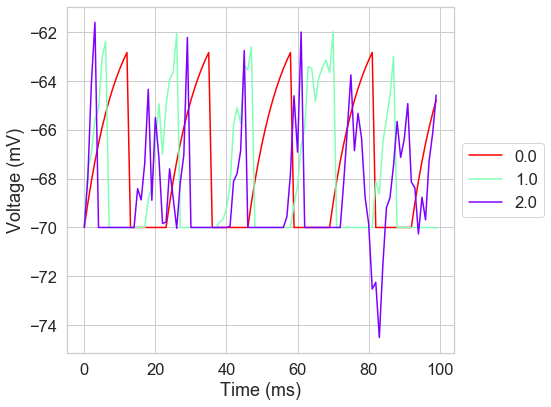

In [142]:
sigmas = np.linspace(0, 2, 3)
colors = plt.cm.rainbow(np.linspace(1,0,len(sigmas)))
for i,v in enumerate(sigmas):
    V_i, s = leaky_noise(time, sigma = v)
    plt.plot(V_i, color = colors[i])
    
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend(np.round(sigmas, 2), loc='center left', bbox_to_anchor=(1, 0.5)  )
plt.savefig('fig7_p3_report3.png', dpi = 600)
plt.show()

## (h) Advanced
What kind of current input I(t) do you need so that this integrate-and-fire neuron generates spike trains similar to the one you analyzed in Exercise (2)? Design a current input that
depends on the stimulation frequency f1. Create 10 spike trains for each stimulus frequency, using the simulation from (f). How does your model compare to the data?

In [143]:
def leaky_input(I, rp = 1, sigma = 1, delta_t = 1, C = 1, g = 0.1, E = -70, V_0 = -70, th = -63):
    V = np.zeros(len(I))
    V[0] = V_0 
    spikes = []
    stop = 0
    for t, i in enumerate(I):
        if t == 999:
            break
        if V[t] <= th and stop <= 0:
            I = i
            termV = (1 - ((delta_t * g)/C))*V[t] 
            termI = delta_t*((g*E)+I)/C
            noise = np.random.normal()
            termNoise = sigma * noise * sqrt(delta_t)
            V[int(t + delta_t)] = termV + termI + termNoise            
        elif V[t] > th:
            V[int(t + delta_t)] = V_0
            stop = rp *delta_t
            spikes.append(t) 
        else:
            V[int(t + delta_t)] = V_0
            stop -= 1
    return V, spikes

In [144]:
def sinusoidal(fr,fs = 1000, stim_t = 500, amplitude = 1):
    x = np.arange(stim_t) # the points on the x axis for plotting
    # compute the value (amplitude) of the sin wave at the for each sample
    stimulation = np.hstack([np.zeros(200), np.sin(2*np.pi*fr * (x/fs)), np.zeros(300)]) * amplitude
    return stimulation

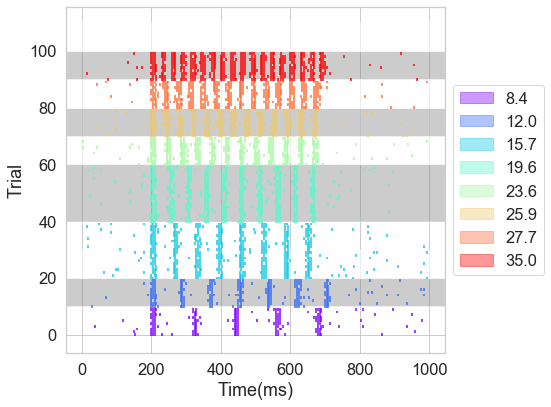

In [145]:
data = sp.loadmat('simdata.mat')
spt = data['spt']
t = data['t'][0]

f1 = data['f1']
time_f1 = []
f1_lens = []
for i, v in enumerate(f1[0]):
    f1_x = spt[f1==v][0]
    time_f1_x = []
    f1_lens.append(len(f1_x))
    for i,v in enumerate(f1_x):
        time_f1.append(t[f1_x[i] == 1])
        
colors = plt.cm.rainbow(np.linspace(0,1,8))
colors2 = np.repeat(colors, f1_lens, axis = 0)

cum = 0
handles = []
for i,v in enumerate(f1_lens):
    cum += v
    if i%2 == 0:
        h = plt.axhspan(cum, cum + v, facecolor= 'grey', alpha = 0.4)
        handles.append(copy.copy(h))
    else:
        h = plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        handles.append(copy.copy(h))
        
for i, h in enumerate(handles):
    h.set_color(colors[i])

plt.eventplot(time_f1, color = colors2)

plt.xlabel('Time(ms)')
plt.ylabel('Trial')

plt.legend(handles = handles, labels =list(f1[0]),
           loc='center left', bbox_to_anchor=(1, 0.5) )
plt.savefig('fig2_p2_report3.png')
plt.show()

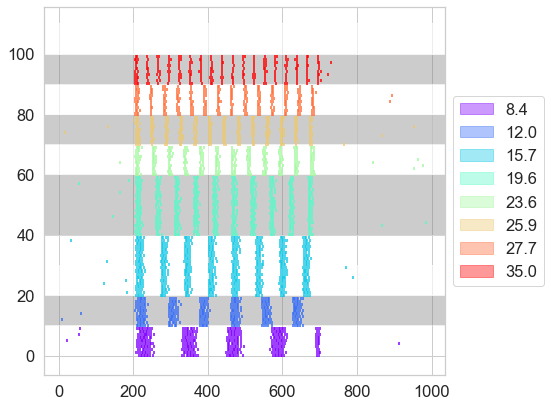

In [146]:
f1 = data['f1'][0]
spikes= []
for i, v in enumerate(f1):
    I = sinusoidal(v, amplitude = 3)
    for j in range(f1_lens[i]):
        V, spks = leaky_input(I, rp=0)
        spikes.append(spks)

colors = plt.cm.rainbow(np.linspace(0,1,8))
colors2 = np.repeat(colors, f1_lens, axis = 0)
plt.eventplot(spikes, color =colors2)

cum = 0
handles = []
for i,v in enumerate(f1_lens):
    cum += v
    if i%2 == 0:
        h = plt.axhspan(cum, cum + v, facecolor= 'grey', alpha = 0.4)
        handles.append(copy.copy(h))
    else:
        h = plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        handles.append(copy.copy(h))
        
for i, h in enumerate(handles):
    h.set_color(colors[i])

plt.legend(handles = handles, labels =list(f1),
           loc='center left', bbox_to_anchor=(1, 0.5) )

plt.show()

In [160]:
%%latex
print('santi gato $ \epsilon $')

<IPython.core.display.Latex object>